# Time series
![](https://media.giphy.com/media/2eK5fWkZwRBhNhbC1h/giphy.gif)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-is-a-time-series?" data-toc-modified-id="What-is-a-time-series?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is a time series?</a></span></li><li><span><a href="#Time-Series-Analysis" data-toc-modified-id="Time-Series-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time Series Analysis</a></span><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Timeslots" data-toc-modified-id="Timeslots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Timeslots</a></span></li><li><span><a href="#Pandas-DateTime-Range" data-toc-modified-id="Pandas-DateTime-Range-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Pandas DateTime Range</a></span></li><li><span><a href="#Mini-recap" data-toc-modified-id="Mini-recap-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Mini-recap</a></span></li><li><span><a href="#Real-data" data-toc-modified-id="Real-data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Real data</a></span></li></ul></li><li><span><a href="#Smoothing-techniques" data-toc-modified-id="Smoothing-techniques-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Smoothing techniques</a></span><ul class="toc-item"><li><span><a href="#Moving-Average" data-toc-modified-id="Moving-Average-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Moving Average</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Stocks-in-market" data-toc-modified-id="Stocks-in-market-3.1.0.1"><span class="toc-item-num">3.1.0.1&nbsp;&nbsp;</span>Stocks in market</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Decomposition-of-a-time-series" data-toc-modified-id="Decomposition-of-a-time-series-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Decomposition of a time series</a></span><ul class="toc-item"><li><span><a href="#Trend-/-Trend" data-toc-modified-id="Trend-/-Trend-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Trend / Trend</a></span><ul class="toc-item"><li><span><a href="#Stationary-Series" data-toc-modified-id="Stationary-Series-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Stationary Series</a></span></li><li><span><a href="#Non-stationary-series" data-toc-modified-id="Non-stationary-series-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Non-stationary series</a></span></li></ul></li><li><span><a href="#Seasonality-/-Seasonality" data-toc-modified-id="Seasonality-/-Seasonality-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Seasonality / Seasonality</a></span></li><li><span><a href="#Residuals" data-toc-modified-id="Residuals-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Residuals</a></span></li><li><span><a href="#Decomposition" data-toc-modified-id="Decomposition-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Decomposition</a></span><ul class="toc-item"><li><span><a href="#Additive-Approach" data-toc-modified-id="Additive-Approach-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Additive Approach</a></span></li><li><span><a href="#Multiplicative-Approach" data-toc-modified-id="Multiplicative-Approach-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Multiplicative Approach</a></span></li></ul></li></ul></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stationarity</a></span><ul class="toc-item"><li><span><a href="#Augmented-Dickey-Fuller-Test" data-toc-modified-id="Augmented-Dickey-Fuller-Test-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Augmented Dickey Fuller Test</a></span></li><li><span><a href="#We-do-a-test-with-a-stationary-series" data-toc-modified-id="We-do-a-test-with-a-stationary-series-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>We do a test with a stationary series</a></span></li></ul></li></ul></div>

## What is a time series?
>A time series is a series of data points indexed in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Therefore, it is a stream of data over time.

**Examples:**
- Stock prices
- Weather data (temperature, humidity, etc.)
- Visits to a web page, visits to Youtube
- Energy generation
- Audio
- Video

## Time Series Analysis
### Motivation
- **Forecast** (Prediction)
- Signals processing
- Pattern recognition and anomaly detection

![](https://miro.medium.com/max/1400/1*s23YtXsNJhJDoyN0KQsVSQ.png)

### Timeslots
When studying a time series, the frequency (intervals) in which the data is collected is very important.

Luckily, pandas has a couple of tools to help us with that.

In [2]:
import pandas as pd
import numpy as np

import datetime
from dateutil.relativedelta import relativedelta

# Viz mantra
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import plotly.express as px
import plotly.graph_objects as go

# Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


# Scikit learn
from sklearn.linear_model import LinearRegression #python3 -m pip install scikit-learn

import warnings
warnings.filterwarnings('ignore')

### Pandas DateTime Range

`pd.date_range(start, end, periods, freq)`

In [2]:
pd.date_range("01/01/2023", "12/31/2023")

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [4]:
pd.date_range("01/01/2023", "12/31/2023", freq="M")

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [5]:
pd.date_range("01/01/2023", "12/31/2023", freq="M").month

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32')

In [8]:
dates = pd.date_range("01/01/2023", periods = 24)
dates

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24'],
              dtype='datetime64[ns]', freq='D')

**Frequency aliases**

Some of the most common are

- "D" : Day
- "W" : Week
- "H" : Time
- "T" : Minute
- "S" : Second
- "L" : Millisecond

Of course, there are many [more](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases).

In [11]:
dates = pd.date_range("04/28/2021", "05/05/2021", periods=8)

In [14]:
df = pd.DataFrame(data = np.random.randint(300, 500, len(dates)), index=dates)

In [15]:
df

,0
2021-04-28,408
2021-04-29,404
2021-04-30,447
2021-05-01,497
2021-05-02,345
2021-05-03,394
2021-05-04,372
2021-05-05,381


In [16]:
df.index

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05'],
              dtype='datetime64[ns]', freq=None)

`infer frequency`

In [25]:
infer_ = pd.infer_freq(df.index)
infer_

'D'

In [26]:
dates.freq = infer_

In [27]:
df = pd.DataFrame(data = np.random.randint(300, 500, len(dates)), index=dates)

In [28]:
df.index

DatetimeIndex(['2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05'],
              dtype='datetime64[ns]', freq='D')

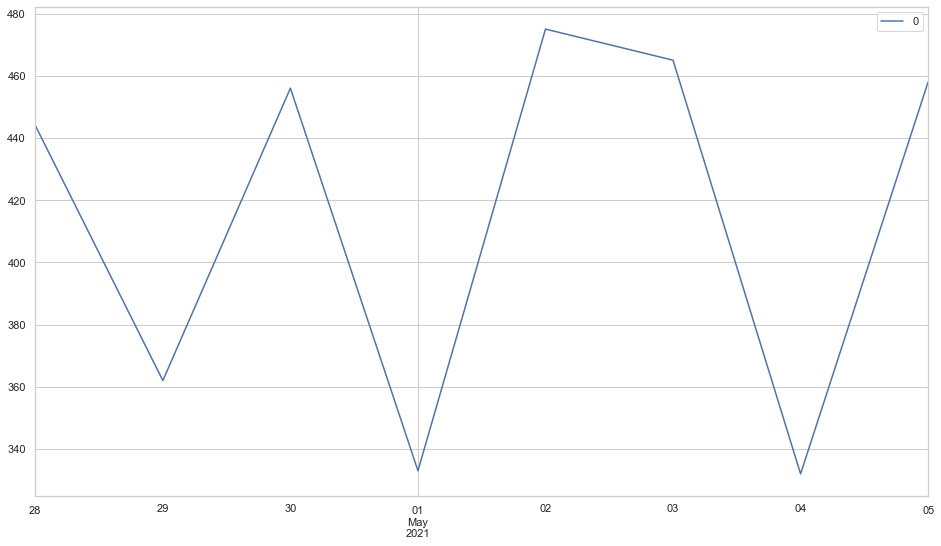

In [30]:
df.plot();

### Mini-recap

- Pandas functions: generate ranges `date_range(arguments)`
- I set the index to be the dates: `set_index(dates)``
- It makes sense when plotting
- If I don't know the frequency: `pd.infer_freq(df.index)` 
- Overwrite: `index.freq_`

I want a column with only the year:

In [128]:
# Year of the week that day is in
# Week of the year
# The day of that week

### Real data

`"https://raw.githubusercontent.com/selva86/datasets/master/a10.csv"`

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv")

In [7]:
df.sample(10)

,date,value
164,2005-03-01,13.402392
13,1992-08-01,3.558776
77,1997-12-01,10.096233
46,1995-05-01,5.194754
197,2007-12-01,25.806090
135,2002-10-01,13.542004
124,2001-11-01,13.674466
203,2008-06-01,19.431740
152,2004-03-01,12.997900
81,1998-04-01,6.675736


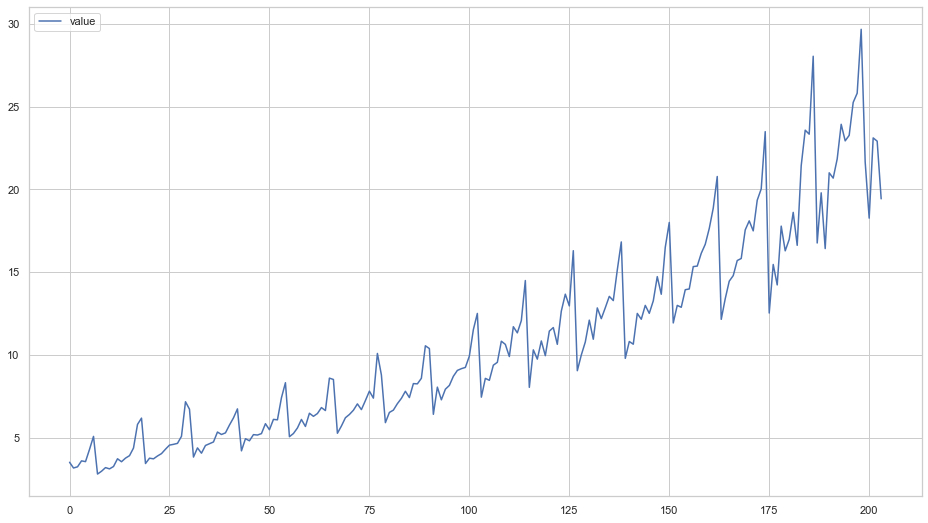

In [40]:
df.plot();

In [32]:
df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


In [8]:
df.index = df["date"]
#df.set_index(df["date"])

In [9]:
df.drop(columns = ["date"], inplace=True)

In [ ]:
"""
Ventas de insulina en Australia:
- Tendencia creciente: la media varía en el tiempo
- Patrón: estacional: se repite cada X

"""

In [ ]:
# la media?

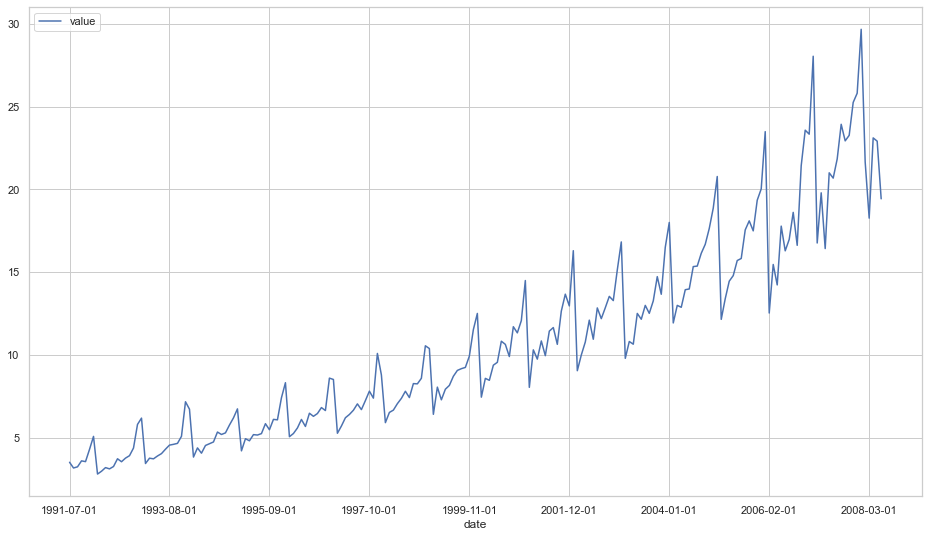

In [10]:
df.plot();

In [53]:
infer_ = pd.infer_freq(df.index)
infer_  # 204 meses

'MS'

[List of differt frequency things can get: docs](https://pandas.pydata.org/docs/user_guide/timeseries.html)

In [ ]:
# media acumulada: bloque 2 
# muchas medias: una por bloque

In [11]:
df.shape

(204, 1)

In [13]:
df.head(5)

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [15]:
la_frecuencia = pd.infer_freq(df.index)
la_frecuencia

'MS'

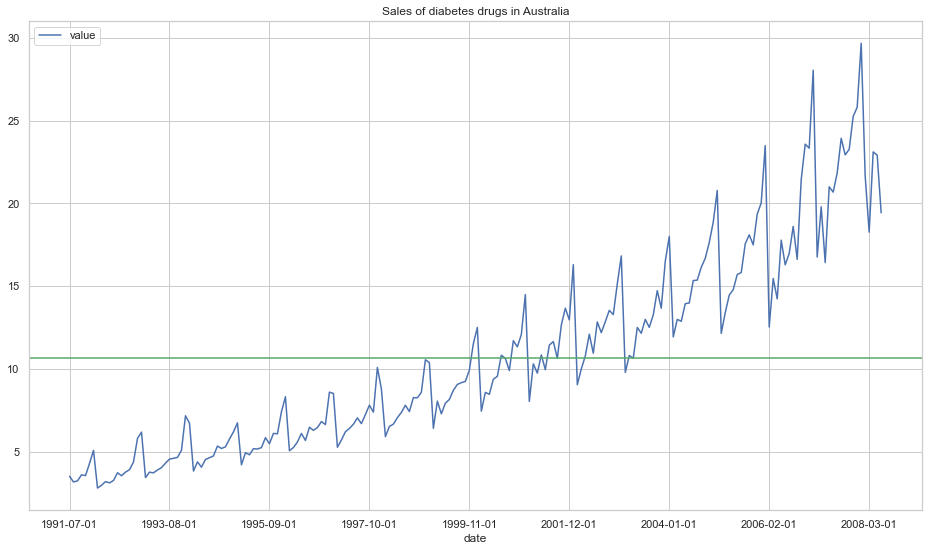

In [57]:
df.plot();
plt.title("Sales of diabetes drugs in Australia") #insulina
plt.axhline(df.value.mean(), c="g", label="mean");

I can export the dates in string and put it in the format I want with the following code...
Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html) because this is infinite.
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

## Smoothing techniques

We started to see some patterns and characteristics in our data.
Let's check the mean of our values.

The mean in this case is not very representative because the time series is a dynamic data and the mean remains static, so the mean of all the values ​​does not tell us much, so let's see how that mean behaves over time.

### Moving Average
I leave you [this](https://www.metatrader5.com/es/terminal/help/indicators/trend_indicators/ma) article on trading indicators where they talk about the "moving average" or moving average.

![](https://ekuiper.org/docs/docs-assets/img/slidingWindow.791d2d43.png)

**Rolling Window**

##### Stocks in market
- Bullish market: you charge, you buy -> Blue line above red line
- Bearish market: you hibernate, go to sleep, don't buy

![flipante explicación gráfica](https://robotwealth.com/wp-content/uploads/2020/05/sma_viz_rolling2.gif)

**Conceptual question**: How would we go about making the average per year?

In [17]:
df.sample()

,value
date,
2000-02-01,7.457199


In [18]:
df.index = pd.to_datetime(df.index)

In [19]:
df["year"] = df.index.year
df

,value,year
date,,
1991-07-01,3.526591,1991
1991-08-01,3.180891,1991
1991-09-01,3.252221,1991
1991-10-01,3.611003,1991
1991-11-01,3.565869,1991
...,...,...
2008-02-01,21.654285,2008
2008-03-01,18.264945,2008
2008-04-01,23.107677,2008


There is the pandas rolling [method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html).

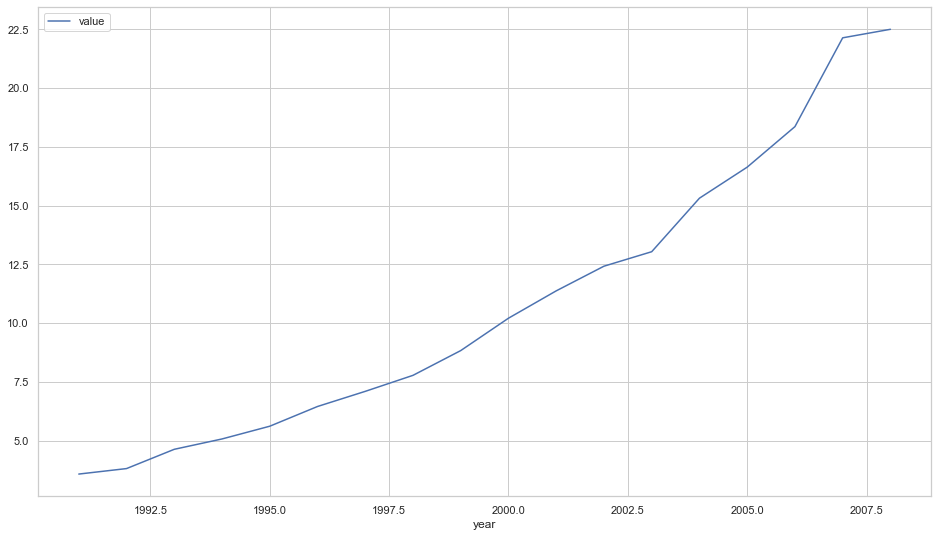

In [20]:
df.groupby("year").mean().plot();

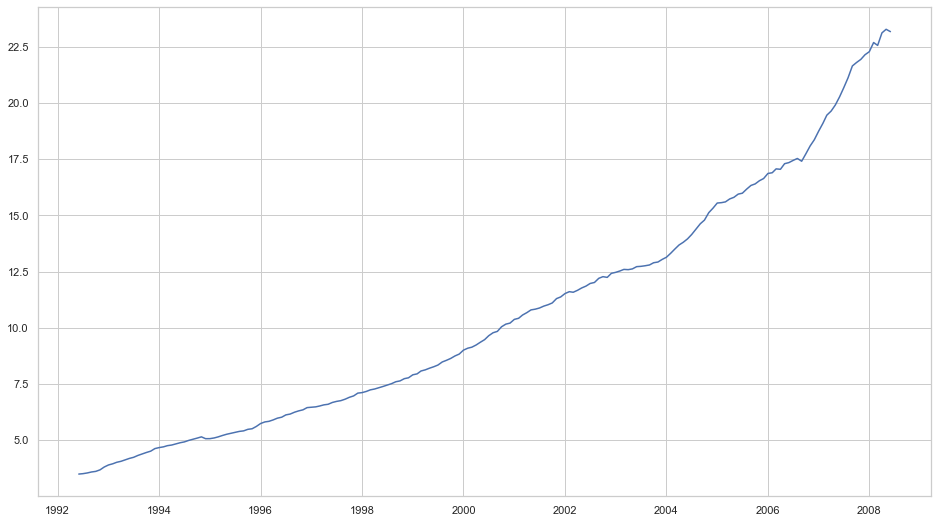

In [21]:
plt.plot(df.value.rolling(window=12).mean(), label="rolling window of 12")

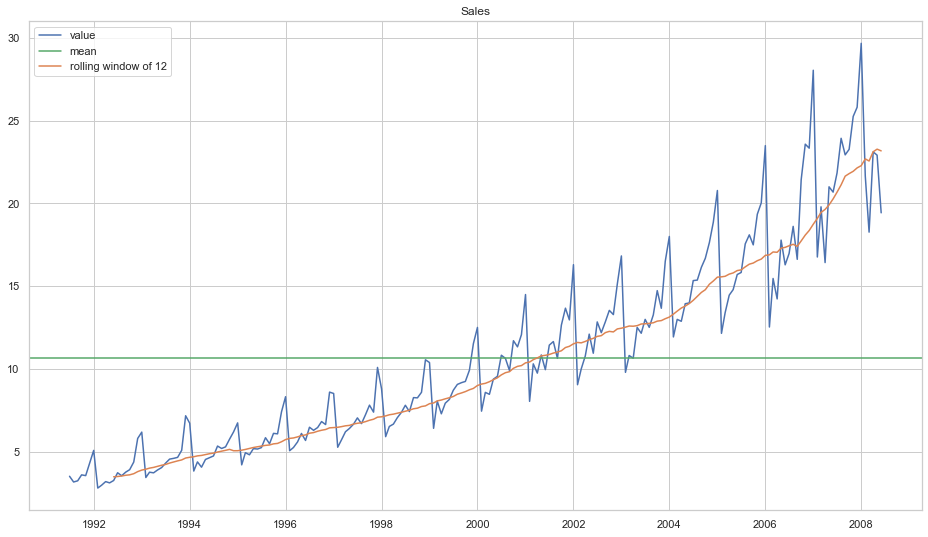

In [80]:
plt.plot(df["value"], label="value")
plt.title("Sales")
plt.axhline(df.value.mean(), label="mean", c="g")

# pandas rolling method
plt.plot(df.value.rolling(window=12).mean(), label="rolling window of 12")

plt.legend();

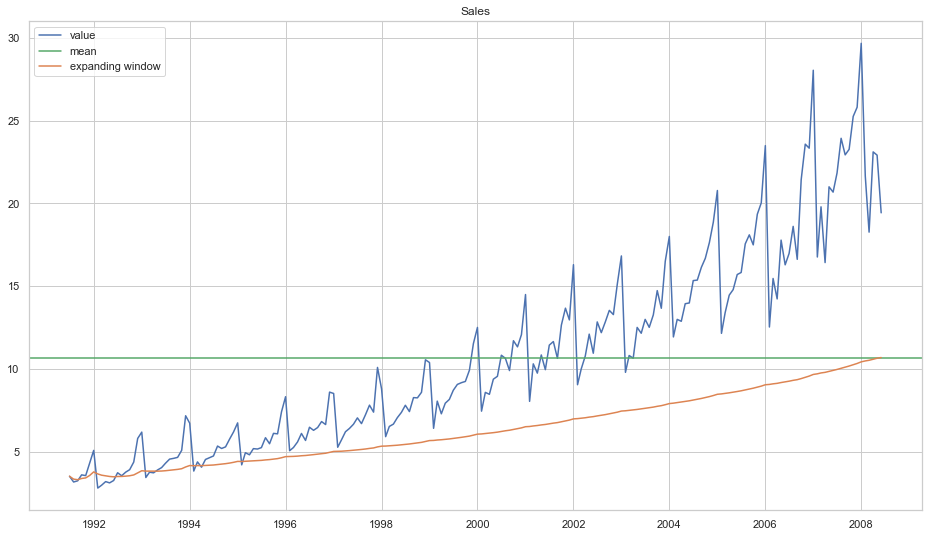

In [81]:
plt.plot(df["value"], label="value")
plt.title("Sales")
plt.axhline(df.value.mean(), label="mean", c="g")

# pandas rolling method
plt.plot(df.value.expanding().mean(), label="expanding window")

plt.legend();

As you can see, there are no values ​​for the mean in the first 12 points, because there is no window of the previous:  12 values.

What about the 6-month moving average and the 24-month moving average?

Let's try a different way of calculating a Moving Average.

Instead of keeping a fixed size window and moving it around, we can try to increase the size of our window each time we move forward.

**Window expansion** / **expanding window**
While moving windows have a fixed size, expanding windows have a fixed starting point and incorporate new data as it becomes available.

This is how I like to think of it:

"What is the mean of the last n values ​​at this time?"
That's what we have, the average up to that point. Let's understand it with the gif:

![otro gif increíble](https://robotwealth.com/wp-content/uploads/2020/05/sma_viz_expanding-1.gif)

Gif article reference with more information [here](https://robotwealth.com/rolling-and-expanding-windows-for-dummies/)

With rolling I can see the average of the evolution of each period and with expanding I can see the average of the general evolution of my company.
Any way we look at it, we can see a trend for sales to increase over time.

## Decomposition of a time series
There are `three` components to a time series.

If we separate the different components of a time series, the way the mean changes over time is called the `trend` and represents the way the values ​​behave in a "long-term" perspective.

### Trend / Trend
How does the mean change over time?
In our example, there is a clear increasing trend.

Not all time series are like this.
#### Stationary Series

Time series whose mean does not change over time are called `stationary`.
![estacionaria](images/estacionaria.png)

The figure is an example of a stationary series. It gives the average monthly performance of the Madrid Stock Exchange during the period from 1988 to 2000 measured by the General Index. Notice that the values ​​in the series appear to move around a fixed monthly return. There are no increasing or decreasing trends over time.

#### Non-stationary series
![lanoestacionaria](images/noestacionaria.png)

However, this other example shows a series that, unlike the previous one, is not clearly stable over time, and is what we call non-stationary. The series corresponds to the Spanish population over 16 years of age, at the end of each quarter during the period from 1977 to 2000. Note in the graph that the series is not stable, since its level increases over time. We say that the series has a clear and positive trend. Most economic and social series are non-stationary (stable) and show trends. In this case, the trend is approximately linear, although the slope of the line that we fit in the first half of the sample would be somewhat higher than the one that we would obtain in the second. This suggests that perhaps the annual population growth is changing over time. The trend of the series would then be variable over time instead of constant. This property is typical of real series in practice, where it is unlikely that we will observe a constant trend over long periods of observation.

**However**, the trend does not explain all the changes in our data. There are ups and downs that repeat in some patterns. This can be attributed to one of two things

### Seasonality / Seasonality

![](https://scontent-bcn1-1.xx.fbcdn.net/v/t1.6435-9/72655555_10159693080791840_4827606685960896512_n.jpg?stp=cp0_dst-jpg_e15_p320x320_q65&_nc_cat=107&ccb=1-7&_nc_sid=8024bb&_nc_ohc=lzZOmDbqbLUAX9auAfR&_nc_ht=scontent-bcn1-1.xx&oh=00_AT_2OsCPeMIFsdtq66ULQZReLEezR44WQf_B5l8Hpzy-Mw&oe=631FF8ED)

Seasonality suggests that certain trends will appear cyclically. For example, temperatures rise and fall depending on the hours of the day and the months of the year. These are two different examples of seasonal patterns that we observe in our life, the change during the day and the change during a whole year.
Patterns of peaks and troughs that repeat at a regular interval are attributed to "seasons." These intervals are usually related to a calendar time pattern (annual, biannual, monthly, daily, weekly, hourly, etc.)
It refers to periodic fluctuations. For example, electricity consumption is high during the day and low at night, or online sales increase during Christmas before slowing down again.
![seasonality](images/seasonarity.png)
As you can see above, there is a clear daily seasonality. Every day a peak is observed towards the afternoon, and the lowest points are the beginning and the end of each day.

### Residuals
Variations that do not repeat in any kind of pattern are called `residuals` or `noise`.
Let's look at a tool to decompose our data.

### Decomposition

Of course, the trend represents the consistent pattern in all the data. The seasonal effect expresses all cyclical effects due to seasonality. Finally, the residuals are the prediction error, or the difference between the actual data and the model we fit.
The simplest type of decomposition is the classical decomposition. With it we expect a linear relationship between the three parts and the observed time series.
There are two main approaches in classical decomposition:
1. Additive
2. Multiplicative

The additive assumes that, for any period of time, the observed value is the sum of the trend, plus the seasonal effect, plus the residual, for that period. Similarly, the multiplicative decomposition assumes that the original series is a product of the three effects.

In [83]:
res = seasonal_decompose(df.value);

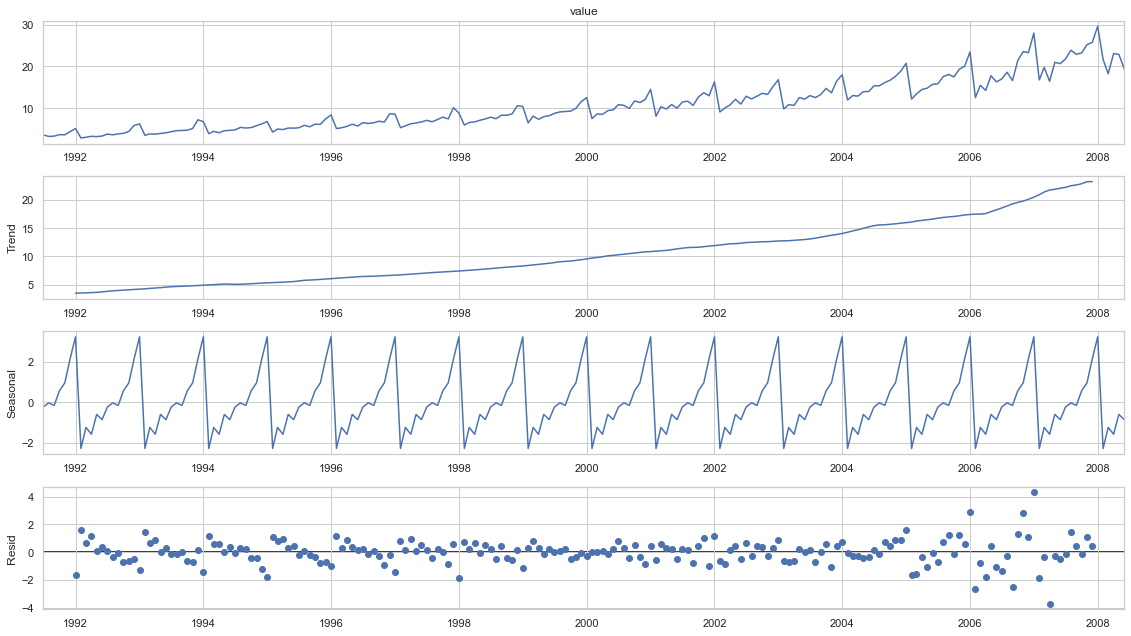

In [86]:
res.plot();

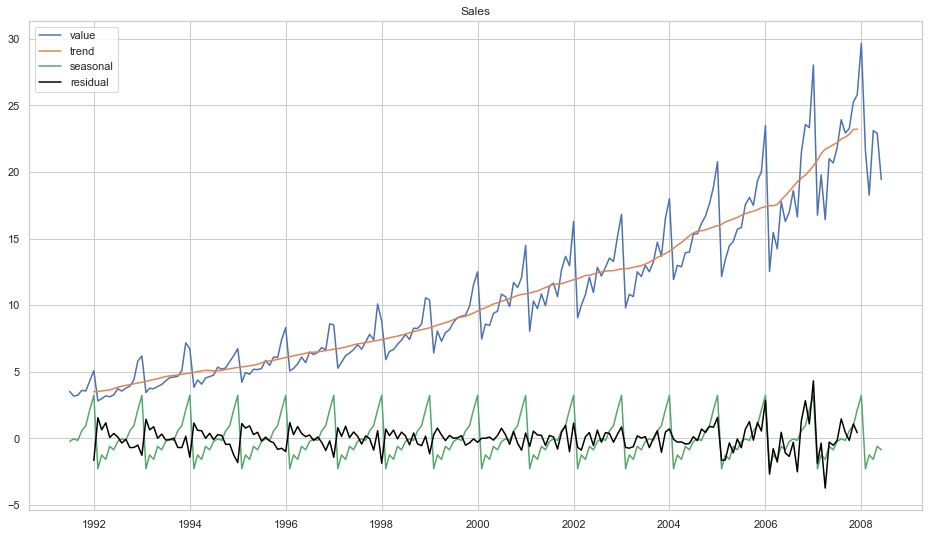

In [87]:
# The whole thing
plt.plot(df["value"], label="value")
plt.title("Sales")

# Each component
plt.plot(res.trend, label="trend")
plt.plot(res.seasonal, label="seasonal", c="g")
plt.plot(res.resid, label="residual", c="black")
plt.legend();

In [35]:
def dickey_rejects (series, alpha = 0.05):
    
    p_value = adfuller(series)[1]
    print(f"p_value es: {p_value}")
    
    h0 = "The series is NOT stationary"
    h1 = "The series IS stationary"
    
    if p_value < alpha:
        return f"We reject H0 and accept H1: {h1}"
    
    elif p_value > alpha:
        return f"We don't have enough info to reject H0, so we keep H0: {h0}"
    
dickey_rejects(sine[0])

p_value es: 0.0


'We reject H0 and accept H1: The series IS stationary'

In [33]:
sine

,0
2021-01-01,1.000000
2021-02-01,1.500000
2021-03-01,1.866025
2021-04-01,2.000000
2021-05-01,1.866025
2021-06-01,1.500000
2021-07-01,1.000000
2021-08-01,0.500000
2021-09-01,0.133975
2021-10-01,0.000000


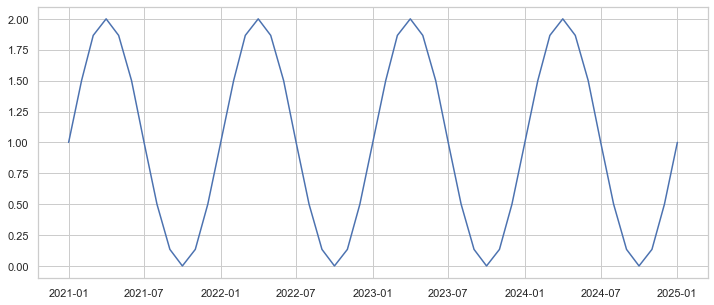

In [26]:
x = np.linspace(0, 8*np.pi, 49)
y = np.sin(x) + 1 
sine = pd.DataFrame(y, index=pd.date_range("01/01/2021", periods=49, freq="MS"))
plt.figure(figsize=(12,5))
plt.plot(sine);

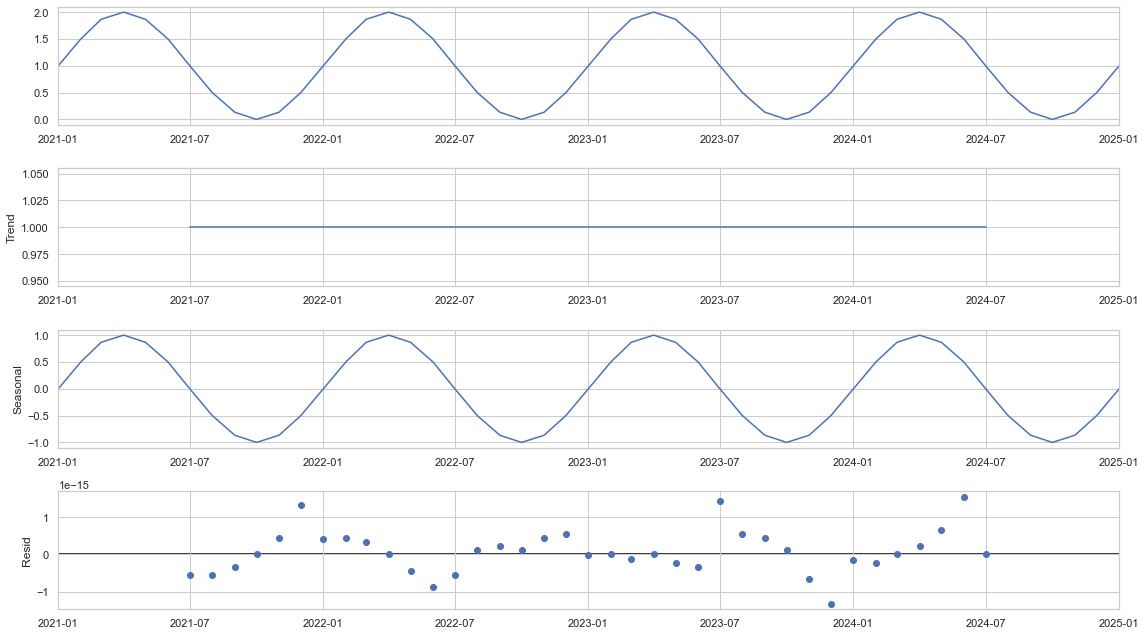

In [89]:
seasonal_decompose(sine).plot();

#### Additive Approach

**Another example**: sine function

Being such a deterministic pattern, the residuals are ridiculous (1e-15).
**Since the variance is constant with the mean, the additive model is good.**

#### Multiplicative Approach

When the variance increases with the mean, the multiplicative model can work better, that is, leave uniform residuals.

It is called a `multiplicative` model because if the parts are multiplied, the original data is recovered.

We notice that the multiplicative model fits our data much better and that when recomposing the signal it is almost perfect even without residual

It'll depend on the data which one will fit better


----

## Stationarity


To carry out an adequate analysis of time series it is vital to determine if the data follow a stationary or non-stationary process. Lucky for us, in the 20th century, statisticians David Dickey and Wayne Fuller developed a test to help us. The method of checking whether a data set comes from a stationary process is known as the Dickey-Fuller test or DF test for short.
The test is based on a contrast of hypotheses. We will have as null hypothesis that the series is Non-Stationary. So the alternative is that it is.


When we do hypothesis testing, we always have to compute the value of a test statistic, which will depend on the sample values ​​and our null hypothesis.
The value of the statistic is compared to a critical value in the Dickey Fuller table. If the test or contrast statistic is less than the critical value, we reject the null hypothesis. Which means that then the data comes from a stationary process.
Another way to reach these conclusions is through the p-value.

The p-value can be interpreted as the value that represents how likely the null hypothesis is. If it is a value very close to zero, it means that this hypothesis is unlikely and should be rejected.
How do we know if it is a very low value, but enough to reject the Null Hypothesis?
Because whenever we do something in inference we are going to have a confidence level, for example, 95%, and what is missing from that to reach 100% is our level of significance, that is, 5%=0.05. We would then compare the p-value with the level of significance. If it is smaller, we say that it is low enough to reject the null hypothesis.

### Augmented Dickey Fuller Test

When doing a statistical test, we have a null hypothesis and an alternative hypothesis and check some test statistic against the critical values ​​to see whether or not we reject the null hypothesis.

- $H_0$ (Null Hypothesis) : The series is not stationary and there is a statistically significant trend

- $H_A$ (Alternative hypothesis) : The series is stationary

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
res = adfuller(df["value"])

# stationary -> mean across time is zero

In [24]:
p_value = res[1]
p_value

1.0

In [ ]:
p_value = 1

In [ ]:
p_value = 0 # Rechazamos H0
p_value = 1 # 
# si p_value es menor que el umbral (probabilidad bajita): H0
# si probabilidad baja -> raro -> si es raro -> la h0 se rechaza
# si la probabilidad alta -> aceptable / expected -> la h0 se mantiene

# 

In [99]:
"""
Null hypothesis: Non Stationarity exists in the series.

Alternative Hypothesis: Stationarity exists in the series
"""

'\nNull hypothesis: Non Stationarity exists in the series.\n\nAlternative Hypothesis: Stationarity exists in the series\n'

In [38]:
adfuller(df["value"])[1]

1.0

In [39]:
adfuller(sine[0])[1]

0.0

In [25]:
def dickey_rejects (series, alpha = 0.05):
    
    p_value = adfuller(series)[1]
    
    h0 = "The series is NOT stationary"
    h1 = "The series IS stationary"
    
    if p_value < alpha:
        return f"We reject H0 and accept H1: {h1}"
    
    elif p_value > alpha:
        return f"We don't have enough info to reject H0, so we keep H0: {h0}"
        

In [102]:
dickey_rejects (df["value"], alpha = 0.05)

"We don't have enough info to reject H0, so we keep H0: The series is NOT stationary"

[Documentation](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html) to interpret the results.
The one that will interest us will be the p value

In [79]:
from statsmodels.tsa.stattools import adfuller

We look at the p-value and compare it to a predefined confidence interval alpha (typically 5%).
> If the p-value > alpha (0.05), we do NOT reject the null hypothesis.

> If the p-value < alpha (0.05), we reject the null hypothesis.

In this case, we do not reject the null hypothesis and say that the time series is not stationary.

### We do a test with a stationary series

Note that the P Value is 0, therefore, we reject the null hypothesis (The time series is NOT stationary).
The time series is stationary